In [1]:
import numpy as np
import pandas as pd
import pegasus as pg
import json
import os
import matplotlib
import matplotlib.pyplot as plt 
import scipy.sparse
import matplotlib.patches as mpatches
import itertools
import random
import scipy.io as sio
import glob
from matplotlib import font_manager
from utils.utils import *

# Extended Data Figure 7b: Multiome celltype peaks

In [2]:
peaks_dir = '/gpfs/gibbs/pi/gerstein/jz435/ShareZhangLab/PTSD/Multiome/25_samples_archr_class_peaks/PeakDFs/'

arr = np.zeros((7,4))
for ii,celltype in enumerate(['EXC','OLI','INH','OPC','MIC','END','AST']):
    df = pd.read_csv(peaks_dir+f'{celltype}.peaks_df.csv',sep=',')
    vals = df.peakType.value_counts().values
    arr[ii] = vals

In [3]:
arr.sum()

774147.0

In [4]:
arr = arr/1e3

In [5]:
arr

array([[72.118, 39.222, 17.679, 14.586],
       [50.193, 20.927, 15.2  , 10.556],
       [59.752, 26.026, 17.047, 12.573],
       [51.138, 24.224, 17.041, 11.642],
       [45.324, 25.434, 16.368,  9.997],
       [57.626, 28.363, 17.787, 12.034],
       [50.833, 22.639, 16.333, 11.485]])

In [6]:
arr = pd.DataFrame(arr,index=celltypes,columns=['Intronic','Distal','Promoter','Exonic'])

In [9]:
colors = [celltype_colors[x] for x in celltypes]
fc_colors = []
for a in [1,0.7,0.4,0.1]:
    for c in colors:
        fc_color = (np.append(list(matplotlib.colors.to_rgb(c)),a))
        fc_colors.append(fc_color)

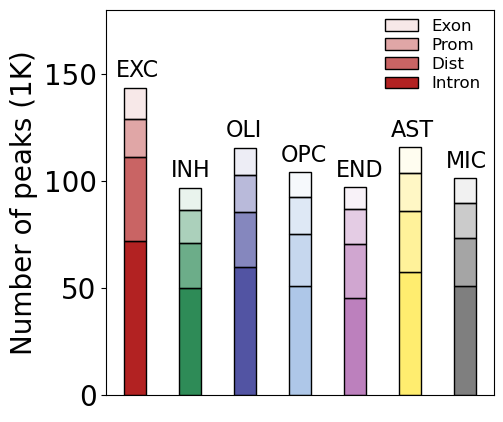

In [10]:
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42
plt.rcParams['font.size']= '20'

plt.rcParams.update({'hatch.color': 'white'})

fig, ax = plt.subplots(figsize=(5,5))

ax.set_ylabel('Number of peaks (1K)')
ax.set_ylim([0,180])
ax.get_xaxis().set_visible(False)

ax.bar(celltypes,arr.values[:,0],width=0.4,label='Intron',color=fc_colors[:7],ec=(0,0,0,1))
ax.bar(celltypes,arr.values[:,1],bottom=arr.values[:,0],width=0.4,label='Dist',color=fc_colors[7:14],ec=(0,0,0,1))
ax.bar(celltypes,arr.values[:,2],bottom=arr.values[:,0]+arr.values[:,1],width=0.4,label='Prom',color=fc_colors[14:21],ec=(0,0,0,1))
ax.bar(celltypes,arr.values[:,3],bottom=arr.values[:,0]+arr.values[:,1]+arr.values[:,2],width=0.4,label='Exon',color=fc_colors[21:],ec=(0,0,0,1))

handles, labels = plt.gca().get_legend_handles_labels()
order = [3,2,1,0]

for ii,c,y in zip(np.arange(7)-0.35,celltypes,arr.sum(axis=1).values+5):
    ax.text(ii,y,c,fontsize=16)
            
plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order],fontsize=12,frameon=False,bbox_to_anchor=(0.68,0.75),labelspacing=0.25) 

# Extended Data Figure 7c: Multiome subtype peaks

In [11]:
peaks_dir = '/gpfs/gibbs/pi/gerstein/jz435/ShareZhangLab/PTSD/Multiome/25_samples_archr_subclass_peaks/PeakDFs/'
arr = np.zeros((14,4))
for ii,celltype in enumerate(subtypes):
    df = pd.read_csv(peaks_dir+f'{celltype}.peaks_df.csv',sep=',')
    vals = df.peakType.value_counts().values
    arr[ii] = vals

In [12]:
arr.sum()

1614118.0

In [13]:
arr = arr/1e3
arr = pd.DataFrame(arr,index=subtypes,columns=['Intronic','Distal','Promoter','Exonic'])

In [15]:
colors = [subtype_colors[x] for x in subtypes]
fc_colors = []
for a in [1,0.7,0.4,0.1]:
    for c in colors:
        fc_color = (np.append(list(matplotlib.colors.to_rgb(c)),a))
        fc_colors.append(fc_color)

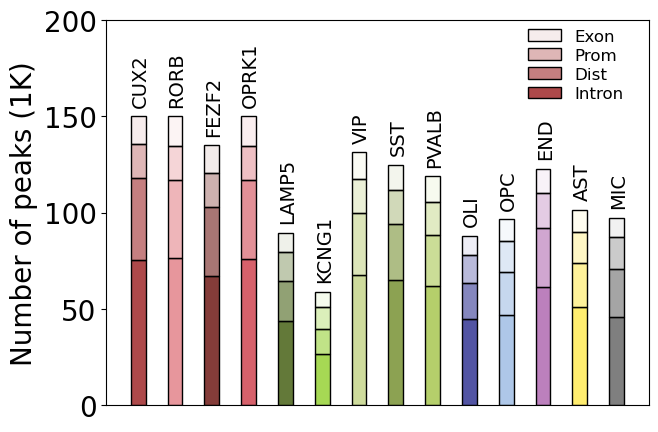

In [17]:
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42
plt.rcParams['font.size']= '20'

plt.rcParams.update({'hatch.color': 'white'})

fig, ax = plt.subplots(figsize=(7,5))

ax.set_ylabel('Number of peaks (1K)')
ax.set_ylim([0,200])
ax.get_xaxis().set_visible(False)

ax.bar(subtypes,arr.values[:,0],width=0.4,label='Intron',color=fc_colors[:len(subtypes)],ec=(0,0,0,1))
ax.bar(subtypes,arr.values[:,1],bottom=arr.values[:,0],width=0.4,label='Dist',color=fc_colors[len(subtypes):len(subtypes)*2],ec=(0,0,0,1))
ax.bar(subtypes,arr.values[:,2],bottom=arr.values[:,0]+arr.values[:,1],width=0.4,label='Prom',color=fc_colors[len(subtypes)*2:len(subtypes)*3],ec=(0,0,0,1))
ax.bar(subtypes,arr.values[:,3],bottom=arr.values[:,0]+arr.values[:,1]+arr.values[:,2],width=0.4,label='Exon',color=fc_colors[len(subtypes)*3:],ec=(0,0,0,1))

handles, labels = plt.gca().get_legend_handles_labels()
order = [3,2,1,0]

for ii,c,y in zip(np.arange(len(subtypes))-0.2,subtypes,arr.sum(axis=1).values+7):
    ax.text(ii,y,c,fontsize=14,rotation=90)
            
plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order],fontsize=12,frameon=False,bbox_to_anchor=(0.75,0.75),labelspacing=0.25) 

# Extended Data Figure 7d: Multiome celltype peaks vs bulk peaks

In [ ]:
celltypes=['CUX2','RORB','FEZF2','OPRK1','VIP','PVALB','SST','LAMP5','KCNG1','OLI','OPC','END','AST','MIC']
ts = [0.2, 0.4, 0.6, 0.8, 1.0] 
bulk='/gpfs/gibbs/pi/gerstein/jz435/ShareZhangLab/PTSD/ATAC/data/bulk.bed'
outdir='/gpfs/gibbs/pi/gerstein/jz435/ShareZhangLab/PTSD/Multiome/25_samples_archr_subclass_peaks/bulk_overlap/out'

with open('/gpfs/gibbs/pi/gerstein/jz435/ShareZhangLab/PTSD/Multiome/bulk_overlap_subclass_jobs.txt','a') as f:
    for celltype in celltypes:
        for t in ts:
            line=f'module load BEDTools/2.30.0-GCCcore-10.2.0; bedtools intersect -a /gpfs/gibbs/pi/gerstein/jz435/ShareZhangLab/PTSD/Multiome/25_samples_archr_subclass_peaks/bulk_overlap/{celltype}.peaks.sorted.bed -b {bulk} -f {t} -sorted -u > {outdir}/{celltype}.{t}.peaks.bed'
            f.writelines(line+'\n')

Text(0, 0.5, 'Overlap %')

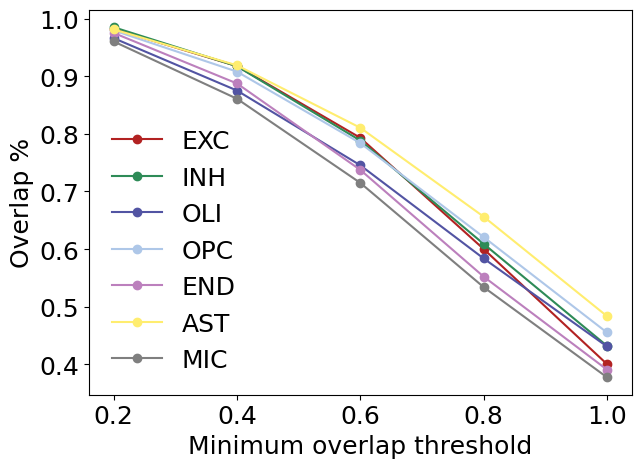

In [18]:
peaksdir = '/gpfs/gibbs/pi/gerstein/jz435/ShareZhangLab/PTSD/Multiome/25_samples_archr_class_peaks/bulk_overlap'
folder = '/gpfs/gibbs/pi/gerstein/jz435/ShareZhangLab/PTSD/Multiome/25_samples_archr_class_peaks/bulk_overlap/out'

ts = [0.2, 0.4, 0.6, 0.8, 1.0] 
allratios = []

all_dfs = []
for celltype in celltypes:
    p = f'{peaksdir}/{celltype}.peaks.bed'

    n = sum([1 for i in open(p,"r").readlines() if i.strip()])
    ratios = []
    for t in ts:
        f = f'{folder}/{celltype}.{t}.peaks.bed'
        t_n = sum([1 for i in open(f,"r").readlines() if i.strip()])
        
        ratio = t_n/n
        ratios.append(ratio)
    df = pd.DataFrame({'ratio':ts,'celltype':celltype,'value':ratios})

    allratios.append(ratios)
    all_dfs.append(df)
    
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42
plt.rcParams['font.size']= '18'
fig, ax = plt.subplots(figsize=(7,5))

colors = colors = list(celltype_colors.values())
for ratios,cell,color in zip(allratios,celltypes,colors):
    ax.plot(ts,ratios,'-o',label=cell,color=color)
ax.set(xticks=ts,xticklabels=ts)
plt.legend(frameon=False)

plt.xlabel('Minimum overlap threshold')
plt.ylabel('Overlap %')

# Extended Data Figure 7e: Multiome subtype peaks vs bulk peaks

Text(0, 0.5, 'Overlap %')

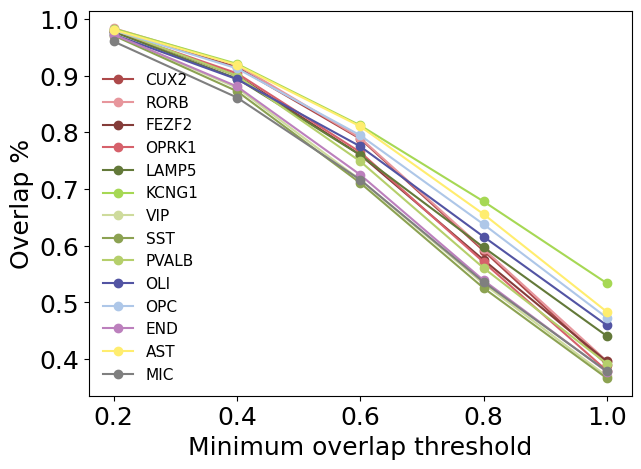

In [20]:
peaksdir = '/gpfs/gibbs/pi/gerstein/jz435/ShareZhangLab/PTSD/Multiome/25_samples_archr_subclass_peaks/bulk_overlap'
folder = '/gpfs/gibbs/pi/gerstein/jz435/ShareZhangLab/PTSD/Multiome/25_samples_archr_subclass_peaks/bulk_overlap/out'

ts = [0.2, 0.4, 0.6, 0.8, 1.0] 
allratios = []

all_dfs = []
for celltype in subtypes:
    p = f'{peaksdir}/{celltype}.peaks.bed'

    n = sum([1 for i in open(p,"r").readlines() if i.strip()])
    ratios = []
    for t in ts:
        f = f'{folder}/{celltype}.{t}.peaks.bed'
        t_n = sum([1 for i in open(f,"r").readlines() if i.strip()])
        
        ratio = t_n/n
        ratios.append(ratio)
    df = pd.DataFrame({'ratio':ts,'celltype':celltype,'value':ratios})
    allratios.append(ratios)
    all_dfs.append(df)

plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42
plt.rcParams['font.size']= '18'
fig, ax = plt.subplots(figsize=(7,5))

colors = list(subtype_colors.values())
for ratios,cell,color in zip(allratios,subtypes,colors):
    ax.plot(ts,ratios,'-o',label=cell,color=color)
ax.set(xticks=ts,xticklabels=ts)
plt.legend(frameon=False,fontsize=11)

plt.xlabel('Minimum overlap threshold')
plt.ylabel('Overlap %')

# Extended Data Figure 7f: Multiome celltype peaks jaccard

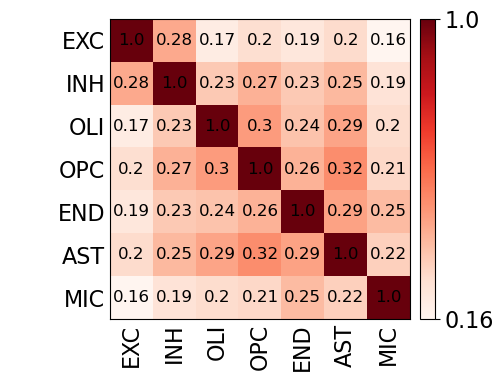

In [21]:
# jaccard similarity: intersection/union

jaccard = pd.read_csv('/gpfs/gibbs/pi/gerstein/jz435/ShareZhangLab/PTSD/Multiome/scripts/jaccard_multiome_class_outs.txt',header=None,sep='\t')
jac = jaccard[2].values.reshape((7,7))

fig = plt.figure(figsize=(5,5))

ax1 = fig.add_axes([0.1,0.1,0.8,0.6])

plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42
plt.rcParams['font.size']= '16'

ax1.axis('off')
ax1.set_xticks([])
ax1.set_yticks([])

axmatrix = fig.add_axes([0.3,0.1,0.6,0.6])
im = axmatrix.matshow(np.log(jac), aspect='auto', cmap='Reds')
axmatrix.set(xticks=np.arange(len(celltypes)),xticklabels=celltypes)
axmatrix.set_xticklabels(celltypes,rotation=90)
axmatrix.tick_params(axis="x", labelbottom=True, labeltop=False)
axmatrix.set(yticks=np.arange(len(celltypes)),yticklabels=celltypes)
axmatrix.tick_params(axis=u'both', which=u'both',length=0)

axcolor = fig.add_axes([0.92,0.1,0.03,0.6])
cbar = plt.colorbar(im, cax=axcolor)
cbar.set_ticks([np.log(jac).min(),np.log(jac).max()])
cbar.set_ticklabels([np.round(jac.min(),2),jac.max()])

for i in range(7):
    for j in range(7):
        axmatrix.text(i,j,np.round(jac[i,j],2),ha="center", va="center",fontsize=12)

# Extended Data Figure 7g: Multiome subtype peaks jaccard

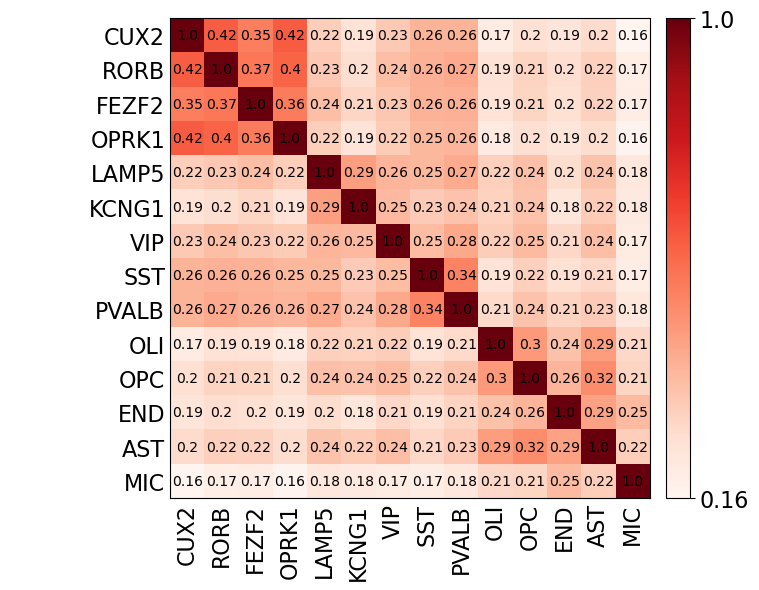

In [27]:
# jaccard similarity: intersection/union

jaccard = pd.read_csv('/gpfs/gibbs/pi/gerstein/jz435/ShareZhangLab/PTSD/Multiome/scripts/jaccard_multiome_subclass_outs.txt',header=None,sep='\t')
n = len(subtypes)
jac = jaccard[2].values.reshape((n,n))

fig = plt.figure(figsize=(8,8))

ax1 = fig.add_axes([0.1,0.1,0.8,0.6])

plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42
plt.rcParams['font.size']= '16'

ax1.axis('off')
ax1.set_xticks([])
ax1.set_yticks([])

axmatrix = fig.add_axes([0.3,0.1,0.6,0.6])
im = axmatrix.matshow(np.log(jac), aspect='auto', cmap='Reds')
axmatrix.set(xticks=np.arange(n),xticklabels=celltypes)
axmatrix.set_xticklabels(subtypes,rotation=90)
axmatrix.tick_params(axis="x", labelbottom=True, labeltop=False)
axmatrix.set(yticks=np.arange(n),yticklabels=subtypes)
axmatrix.tick_params(axis=u'both', which=u'both',length=0)

axcolor = fig.add_axes([0.92,0.1,0.03,0.6])
cbar = plt.colorbar(im, cax=axcolor)
cbar.set_ticks([np.log(jac).min(),np.log(jac).max()])
cbar.set_ticklabels([np.round(jac.min(),2),jac.max()])

for i in range(n):
    for j in range(n):
        axmatrix.text(i,j,np.round(jac[i,j],2),ha="center", va="center",fontsize=10)

# Extended Data Figure 7h: Multiome celltype peaks vs ATAC celltype peaks jaccard

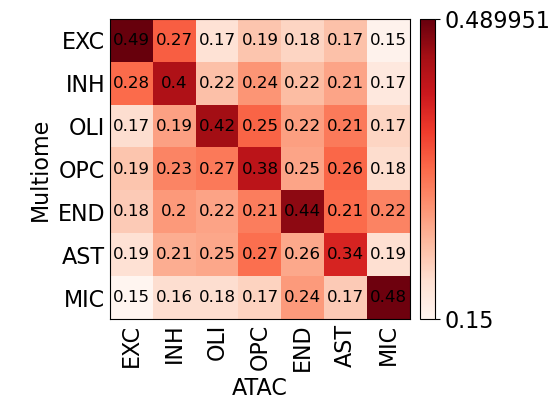

In [2]:
# jaccard similarity: intersection/union

jaccard = pd.read_csv('/gpfs/gibbs/pi/gerstein/jz435/ShareZhangLab/PTSD/Multiome/scripts/jaccard_outs.txt',header=None,sep='\t')
n = len(celltypes)
jac = jaccard[2].values.reshape((n,n))

fig = plt.figure(figsize=(5,5))

ax1 = fig.add_axes([0.1,0.1,0.8,0.6])

plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42
plt.rcParams['font.size']= '16'

ax1.axis('off')
ax1.set_xticks([])
ax1.set_yticks([])

axmatrix = fig.add_axes([0.3,0.1,0.6,0.6])
im = axmatrix.matshow(np.log(jac), aspect='auto', cmap='Reds')
axmatrix.set(xticks=np.arange(n),xticklabels=celltypes)
axmatrix.set_xticklabels(celltypes,rotation=90)
axmatrix.tick_params(axis="x", labelbottom=True, labeltop=False)
axmatrix.set(yticks=np.arange(n),yticklabels=celltypes)
axmatrix.tick_params(axis=u'both', which=u'both',length=0)
plt.xlabel('ATAC')
plt.ylabel('Multiome')

axcolor = fig.add_axes([0.92,0.1,0.03,0.6])
cbar = plt.colorbar(im, cax=axcolor)
cbar.set_ticks([np.log(jac).min(),np.log(jac).max()])
cbar.set_ticklabels([np.round(jac.min(),2),jac.max()])

for i in range(7):
    for j in range(7):
        axmatrix.text(i,j,np.round(jac[i,j],2),ha="center", va="center",fontsize=12)